# 1、使用贝叶斯分类

## 读取训练数据

In [103]:
import pandas as pd

train_data = pd.read_csv('yimei_data.csv',encoding='gbk')
train_data.head()

,data,lable
0,牙釉质是牙齿最外面的一层，牙本质是牙釉质下面的一层 牙齿矿化程度高， 牙釉质是透明的，牙本质...,1
1,我觉得这样很好，范冰冰不也是吗，120斤的体重，胳膊和腰都不算是细的，但人家就是很美，那种绝...,1
2,初粉bp的时候最喜她的声音所以最先认出她。，她的嘴有有一种地包天的感觉，但咬合又好像没有 我...,1
3,回复@1nnioo:看清楚了，中学时的高允真。 回复@1nnioo:自己百度。中学时眼睛小，...,1
4,我呢？请指教！手机不在身边暂时只有这一张，这张是原相机但是妆后，而且还凹角度捂腮了，脸大两边...,1


In [104]:
# 取出标签
y_train = train_data['lable']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: lable, dtype: int64

### 加载停用词表

In [105]:
stop_word = set()
with open('stop_word.txt', encoding='utf-8') as f:
    for word in f.readlines():
        stop_word.add(word.replace('\n',''))


In [106]:
# 将训练和测试数据都转成词list
import jieba


def review_to_wordlist(review):
    '''
    把医美聊天信息转成词序列
    '''
    words_list = jieba.cut(review, cut_all=False)
    ok_list = list()
    for each_word in words_list:
        if each_word not in stop_word:
            ok_list.append(each_word)
    
    return ok_list

x_train = []
for i in range(0, len(train_data['data'])):
    x_train.append(" ".join(review_to_wordlist(train_data['data'][i])))
x_train[0:20]

['牙釉质 牙齿 外面 一层 ， 牙本质 牙釉质 一层   牙齿 矿化 程度 高 ，   牙釉质 透明 ， 牙本质 颜色 黄色 ， 透出 颜色 黄色 ； 矿化 程度 低 牙齿 乳白色 。 冷光 美白 牙齿 敏感 建议 做 ， 牙齿 敏感 做 情况 一年 恢复 做 美白 色度 ！ 牙齿 健康 ！',
 '， 范冰冰 ， 120 斤 体重 ， 胳膊 腰 不算 细 ， 美 ， 那种 绝食 减肥 女明星 病态 美 真的 恭维',
 '初粉 bp 最喜 声音 最先 认出 。 ， 嘴 一种 包天 感觉 ， 咬合 好像   po 主说 ， 这时候 眼睑 （ 词 ） 反弹 后遗症   李宇春 长得 态度 ， 美人 谈不上 （ 小声   曾黎   鼻子 实在 … … [ 允悲 ] 不太吃 款',
 '回复 @ 1nnioo : 看清楚 ， 中学 时 高 允真 。   回复 @ 1nnioo : 百度 。 中学 时 眼睛 ， 塌 鼻梁 ， 很丑 。 算 微整 ， 换头 说 微整 。   回复 @ hysjvg : 右边 一个整 容 韩国 明星 ， 变化很大 ， 看不出来 整容',
 '？ 请 指教 ！ 手机 身边 暂时 一张 ， 这张 原 相机 妆 ， 凹 角度 捂 腮 ， 脸大 两边 脸 对称 办法 。 想 做做 医美   回复 @ 仙女 颜究 : ， 皮肤 确实 ， 长痘 混油 ， 工作 熬夜 作息 混乱',
 '哒 ！ 谢谢 仙女 ！ 明天 剪 ～   分享 图片   剪 短发   分享 图片   仙女 想 问 ！ 脸型 适合 剪短 发 ？',
 '天生 眼袋 浮肿   贼 显老   只想去 眼袋',
 '回复 @ 柳柳 扭溜牛 : 小姐姐 鼻子 真 好看   第一种 哈哈哈 ， 平时 看马思纯 ， 一看 照片 发现 上学 短发 刘海 脸型 妥妥 马思纯 [ 允悲 ]',
 '昨天 哈哈哈哈 哈哈哈哈 哈哈哈 研究 颅 顶',
 '延长 中庭',
 '感觉 ， 脸 露出',
 '评论 ： 黑 。 废话 ， 云南 几天 ， 紫外线 强能 黑 ， 涂黑 粉 ， 羊毛 杨洋 脸 ， 黑粉 脸 。 gay 。 啥意思 ， 话里有话 ， ， gay gay 一眼 ？ 成年人 张口 ， 说 性 歧视 ，   健身 重要性 ， 别刷 ， 锻炼',
 '回复 @ 仙女 颜究 : 好像 没什么 感

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIV
# 初始化TFIV对象，去停用词，加2元语言模型
tfv = TFIV(min_df=3,  max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1)


In [108]:
tfv.fit(x_train)
x_train = tfv.transform(x_train)

In [109]:
x_train.shape

(14673, 13637)

In [110]:
from sklearn.naive_bayes import MultinomialNB as MNB

model_NB = MNB()
model_NB.fit(x_train, y_train) #特征数据直接灌进来
MNB(alpha=1.0, class_prior=None, fit_prior=True)

from sklearn.model_selection import cross_val_score
import numpy as np

print("多项式贝叶斯分类器20折交叉验证得分: ", np.mean(cross_val_score(model_NB, x_train, y_train, cv=20, scoring='roc_auc')))

多项式贝叶斯分类器20折交叉验证得分:  0.9275615343627093


In [111]:
def predict_data(data):
    predict_data = review_to_wordlist(data)
    predict_data = [' '.join(predict_data)]
    predict_data = tfv.transform(predict_data)
    predict_value = model_NB.predict(predict_data)
    return predict_value

In [112]:
text1 = '天气真好'
a=predict_data(text1)
print(text1, a[0])

text2 = '回复@日暮温柔裡_:我自己剪的hhhhh 其实每天都睡的不一样 刚刚画好的眼妆 http://t.cn/AiRPjqT5'
b=predict_data(text2)
print(text2,b[0])

天气真好 0
回复@日暮温柔裡_:我自己剪的hhhhh 其实每天都睡的不一样 刚刚画好的眼妆 http://t.cn/AiRPjqT5 1


# 2、使用逻辑斯蒂回归

In [113]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV

In [114]:
# 设定grid search的参数
grid_values = {'C':[30]}
# 设定打分为roc_auc
model_LR = GridSearchCV(LR(penalty='l2', dual = True, random_state=0), grid_values, scoring='roc_auc', cv=20)
# 数据灌进来
model_LR.fit(x_train,y_train)
# 20折交叉验证，开始漫长的等待...
GridSearchCV(cv=10, estimator=LR(C=1.0, class_weight=None, dual=True,
             fit_intercept=True, intercept_scaling=1, penalty='L2', random_state=0, tol=0.0001),
         iid=True,  n_jobs=1,
        param_grid={'C': [30]}, pre_dispatch='2*n_jobs', refit=True,
         scoring='roc_auc', verbose=0)
#输出结果
print(model_LR.best_score_)

d:\venvs\spider_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\venvs\spider_env\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\venvs\spider_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\venvs\spider_env\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\venvs\spider_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)

0.9664665870927852


d:\venvs\spider_env\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 学习曲线函数

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
plt.rcParams['font.sans-serif']=['SimHei'] 

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
#         plt.draw()
        plt.show()
#         plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    print('midpoint %s' % midpoint)
    print('diff %s' % diff)
    return midpoint, diff


### 绘制贝叶斯学习曲线

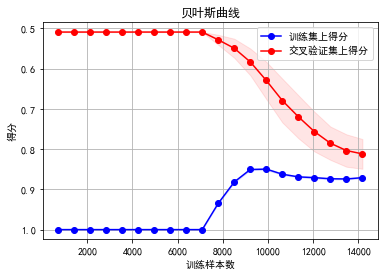

midpoint 0.8236218899772492
diff 0.09724369681725331


(0.8236218899772492, 0.09724369681725331)

In [125]:
plot_learning_curve(model_NB,'贝叶斯曲线',x_train,y_train,cv=30)